<a href="https://colab.research.google.com/github/JoHussien/DSPAssignments/blob/main/InvestigatingNetflixMoviesandGuestStarsinTheOffice/InvestigatingNetflixMoviesandGuestStarsinTheOffice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [ ]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
office = pd.read_csv('office_episodes.csv')
office.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [ ]:
#printing some infor about the dataset
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


#### So from the above data, the guest_start has only 29 non-null entries. In other words, out of the 188 episodes we have 29 only had gest stars in them.

In [ ]:
#Printing some statistics about the dataset
office.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


Another important fact rises here from the above data, that the minum rating an episode had was 6.6 while the maxium rating was 9.8. Again there was a relatively high standard deviation between the episodes' rating equalling 0.589 which means that the episodes rating was a bit variant.
Additionally, the office series had an average of 7.246 US million views.

# The  Next step is to plot the data
This is a scatter plot of the data that contains the following attributes:

Each episode's episode number plotted along the x-axis
Each episode's viewership (in millions) plotted along the y-axis

No handles with labels found to put in legend.


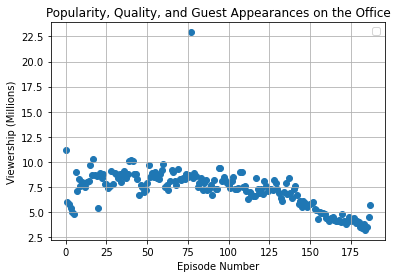

In [ ]:
fig = plt.figure()
plt.scatter(office['episode_number'],office['viewership_mil'])
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.legend()
plt.grid(True)
plt.show()

### Now we will color our plot based on the following conditions
Ratings < 0.25 are colored "red"

Ratings >= 0.25 and < 0.50 are colored "orange"

Ratings >= 0.50 and < 0.75 are colored "lightgreen"

Ratings >= 0.75 are colored "darkgreen"

In [ ]:
#Generating the color scheme
color_scheme = []
for ind,row  in office.iterrows():
    if row['scaled_ratings'] < 0.25:
        color_scheme.append("red")
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.5:
        color_scheme.append("orange")
    elif row['scaled_ratings'] >= 0.5 and row['scaled_ratings'] < 0.75:
        color_scheme.append("lightgreen")
    elif row['scaled_ratings']>=0.75:
        color_scheme.append("darkgreen")
Ratings = [0.25,0.5,0.75]

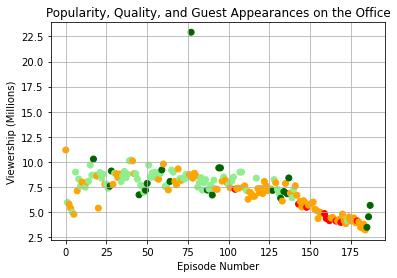

In [ ]:
fig = plt.figure()
plt.scatter(office['episode_number'],office['viewership_mil'], c=color_scheme)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.grid(True)
plt.show()

# Sizing the plot
We will introduce a sizing system to the plot such that:

Episodes with guest appearances have a marker size of 250

Episodes without are sized 25

In [ ]:
#Creating the sizing system
sizing_system = []
for ind,row  in office.iterrows():
    if row['has_guests'] == True:
        sizing_system.append(250)
    elif row['has_guests'] == False:
        sizing_system.append(25)
print(sizing_system)

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250, 25, 25, 250, 25, 250, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 250]


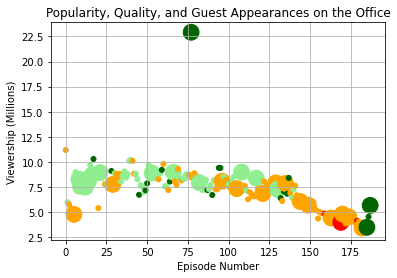

In [ ]:
#Applying the sizing sytem on the plot
fig = plt.figure()
plt.scatter(office['episode_number'],office['viewership_mil'],s=sizing_system , c=color_scheme)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.grid(True)
plt.show()

# Bonus Step
Differentiating Guest appearances not just with size, but also with a star! Using the marker attribute

In [ ]:
#Creating the marking system
marking_system = []
hasGuests = office[office['has_guests']==True]
sizing_system_guests = []
for ind,row  in hasGuests.iterrows():
    if row['has_guests'] == True:
        sizing_system_guests.append(250)
    elif row['has_guests'] == False:
        sizing_system_guests.append(25)
color_scheme_guests = []
for ind,row  in hasGuests.iterrows():
    if row['scaled_ratings'] < 0.25:
        color_scheme_guests.append("red")
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.5:
        color_scheme_guests.append("orange")
    elif row['scaled_ratings'] >= 0.5 and row['scaled_ratings'] < 0.75:
        color_scheme_guests.append("lightgreen")
    elif row['scaled_ratings']>=0.75:
        color_scheme_guests.append("darkgreen")

NotHasGuests = office[office['has_guests']==False]
sizing_system_No_guests = []
for ind,row  in NotHasGuests.iterrows():
    if row['has_guests'] == True:
        sizing_system_No_guests.append(250)
    elif row['has_guests'] == False:
        sizing_system_No_guests.append(25)
color_scheme_No_guests = []
for ind,row  in NotHasGuests.iterrows():
    if row['scaled_ratings'] < 0.25:
        color_scheme_No_guests.append("red")
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.5:
        color_scheme_No_guests.append("orange")
    elif row['scaled_ratings'] >= 0.5 and row['scaled_ratings'] < 0.75:
        color_scheme_No_guests.append("lightgreen")
    elif row['scaled_ratings']>=0.75:
        color_scheme_No_guests.append("darkgreen")
        
print(len(color_scheme_No_guests), len(NotHasGuests), len(sizing_system_No_guests))

159 159 159


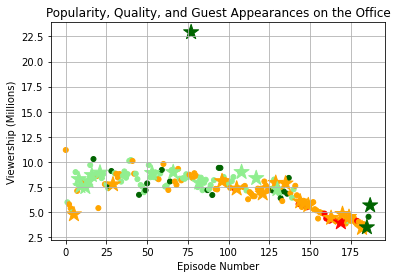

In [ ]:
#Applying the marking sytem on the plot by creating two plots one for episodes without guest stars 
#and those marker will be normal while the other plot which will be over it it will be for 
#episodes with guest stars and those will have a marker of *
fig = plt.figure()
plt.scatter(NotHasGuests['episode_number'],NotHasGuests['viewership_mil'],s=sizing_system_No_guests , c=color_scheme_No_guests, )

plt.scatter(hasGuests['episode_number'],hasGuests['viewership_mil'],s=sizing_system_guests , c=color_scheme_guests, marker="*")
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.grid(True)
plt.show()

# The name of one of the guest stars who were in the most watched Office episode. 

In [ ]:
maximum_viewed_episode = office[office['viewership_mil'] == office['viewership_mil'].max()]
# print(maximum_viewed_episode)
top_stars = maximum_viewed_episode['guest_stars']
print(top_stars)

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [ ]:
top_star = "Cloris Leachman"